# Task 1: Classification Problem 
"Bank Marketing Data Set"

    source: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("bank.csv",sep=';')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
df.shape

(4521, 17)

In [5]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
df.apply(lambda x : len(x.unique()))

age            67
job            12
marital         3
education       4
default         2
balance      2353
housing         2
loan            2
contact         3
day            31
month          12
duration      875
campaign       32
pdays         292
previous       24
poutcome        4
y               2
dtype: int64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
#correlation_matrix
corr_m = df.corr() 
f, ax = plt.subplots(figsize =(7,6)) 
sns.heatmap(corr_m,annot=True, cmap ="YlGnBu", linewidths = 0.1) 

/Users/pradee/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


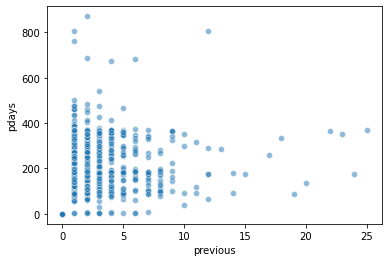

In [8]:
sns.scatterplot(x = 'previous',y = 'pdays',data = df,alpha = 0.5);

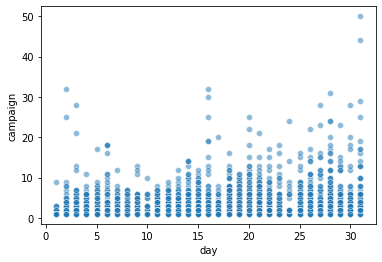

In [9]:
sns.scatterplot(x = 'day',y = 'campaign',data = df,alpha = 0.5);

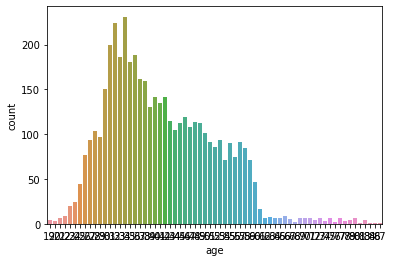

In [10]:
sns.countplot(x = 'age', data = df)

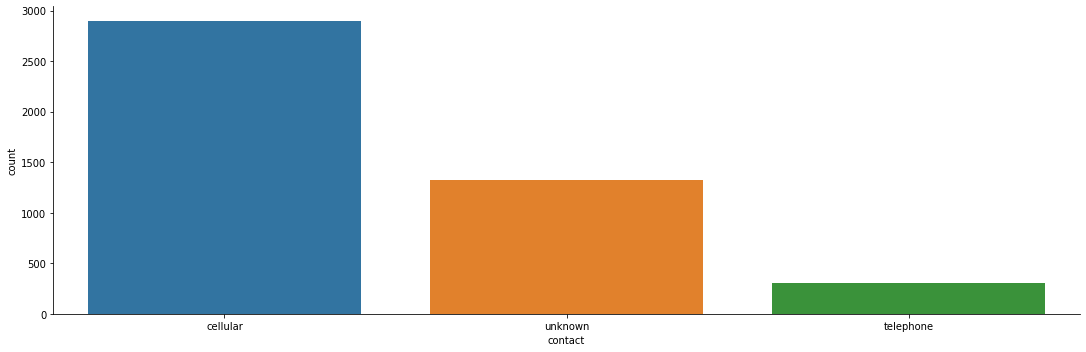

In [11]:
sns.catplot('contact',kind = 'count',data = df,aspect =3)

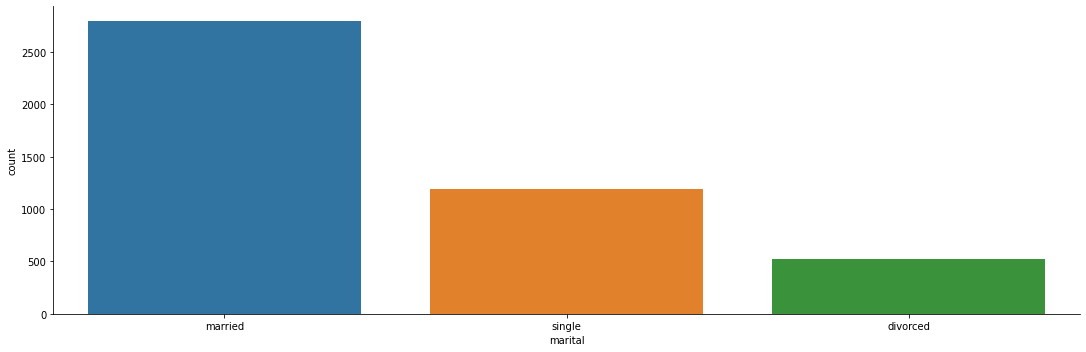

In [12]:
sns.catplot('marital',kind = 'count',data = df,aspect =3)

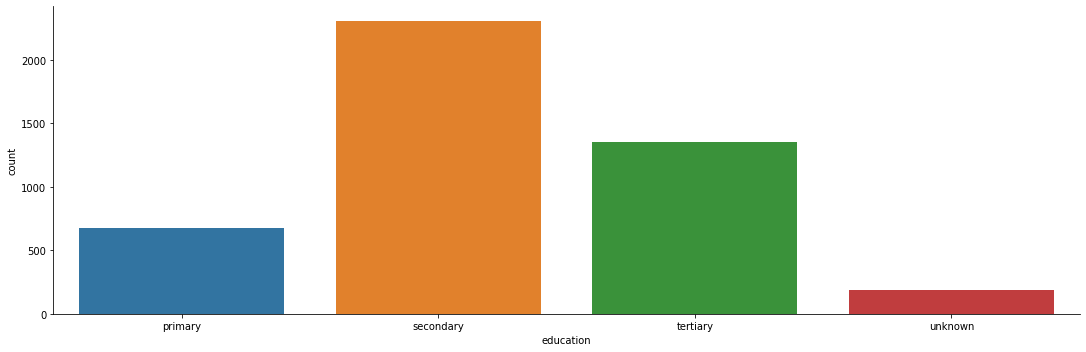

In [13]:
sns.catplot('education',kind = 'count',data = df,aspect =3)

In [14]:
df['education'].replace({'unknown':'secondary'},inplace = True)

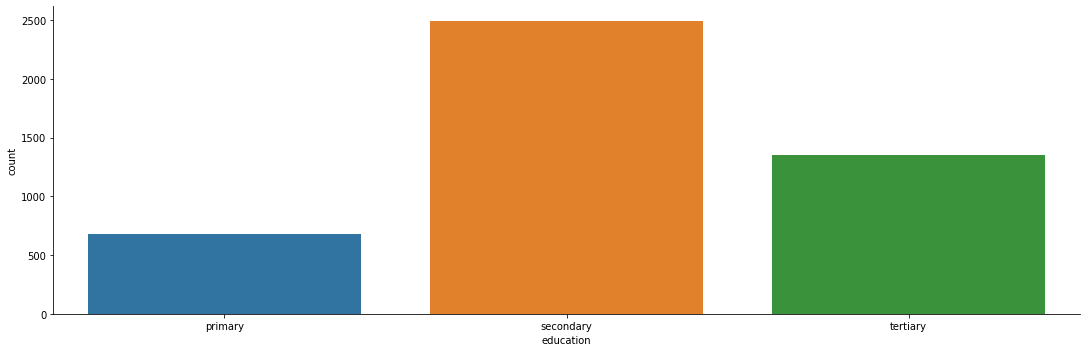

In [15]:
sns.catplot('education',kind = 'count',data = df,aspect =3)

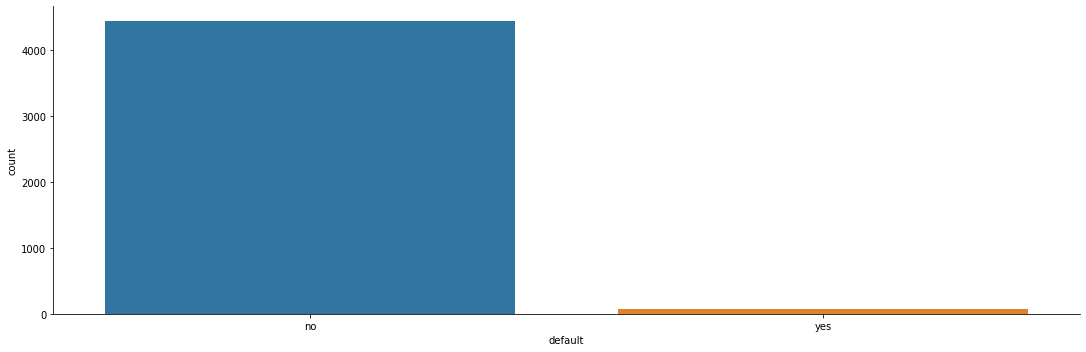

In [16]:
sns.catplot('default',kind = 'count',data = df,aspect =3)

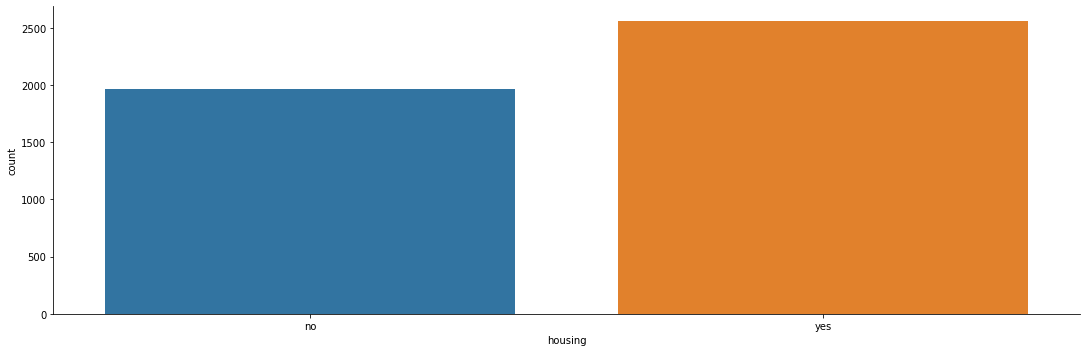

In [17]:
sns.catplot('housing',kind = 'count',data = df,aspect =3)

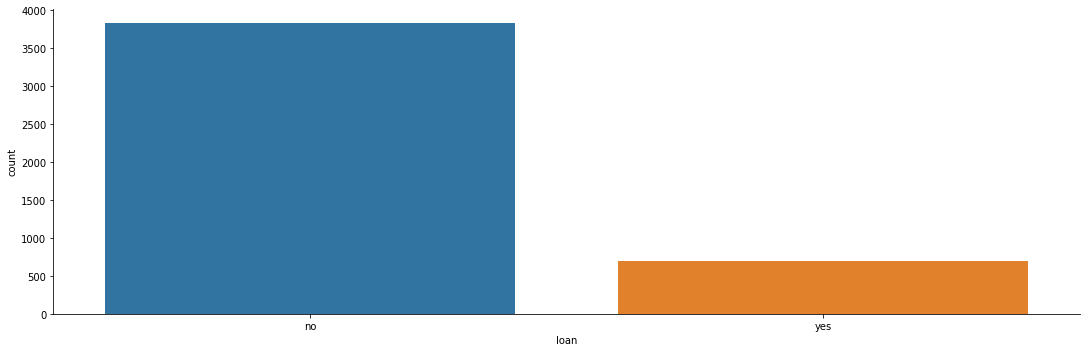

In [18]:
sns.catplot('loan',kind = 'count',data = df,aspect =3)

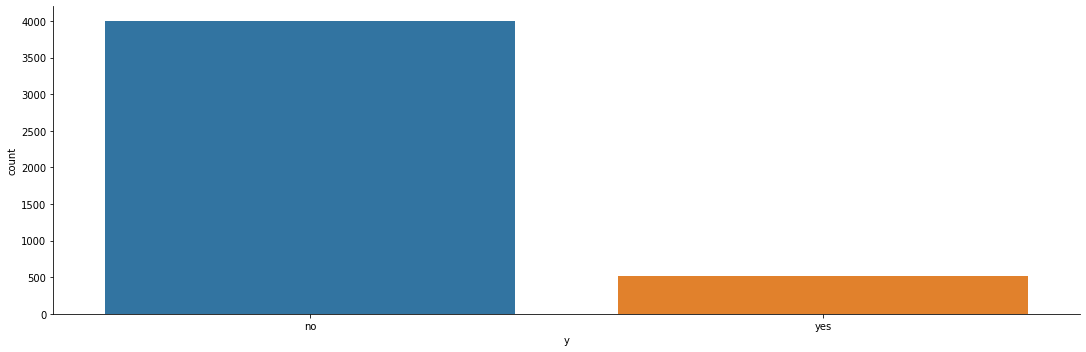

In [19]:
sns.catplot('y',kind = 'count',data = df,aspect =3)

In [20]:
df['contact'].replace({'unknown':'cellular'},inplace = True)

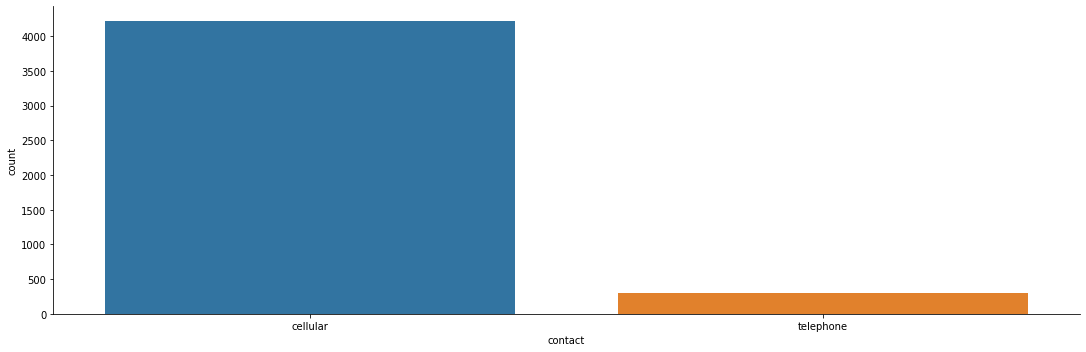

In [21]:
sns.catplot('contact',kind = 'count',data = df,aspect =3)

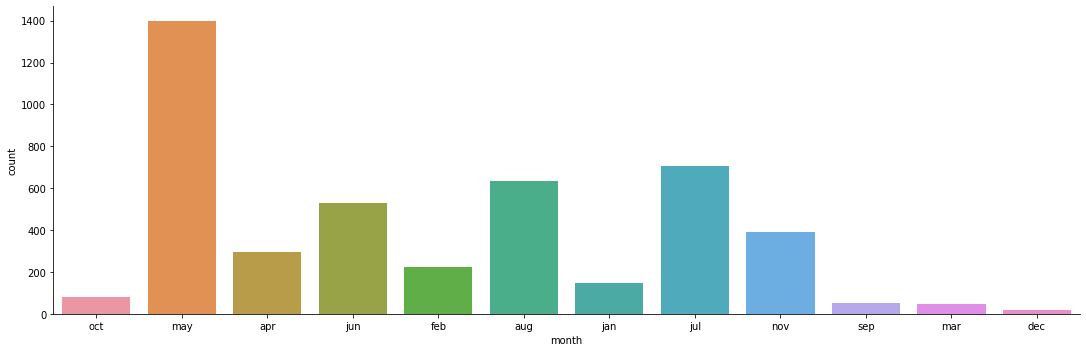

In [22]:
sns.catplot('month',kind = 'count',data = df,aspect =3)

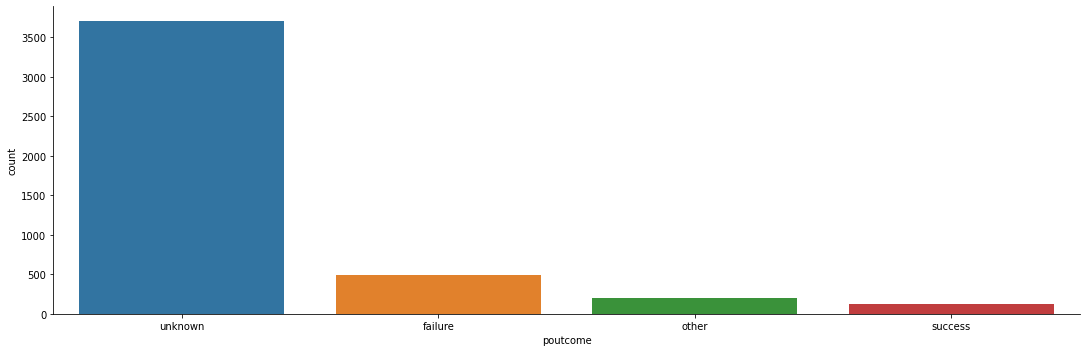

In [23]:
sns.catplot('poutcome',kind = 'count',data = df,aspect =3)

In [24]:
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(exclude=['object']).columns

In [25]:
cat_cols,num_cols

(Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
        'month', 'poutcome', 'y'],
       dtype='object'),
 Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object'))

In [26]:
#treat for age column 
age_q1=df['age'].quantile(q = 0.25)
age_q2=df['age'].quantile(q = 0.50)
age_q3=df['age'].quantile(q = 0.75)
age_q4=df['age'].quantile(q = 1.00)

In [27]:
print('Quartiles:',age_q1,age_q2,age_q3,age_q4)
outliers=age_q3+1.5*age_q3-1.5*age_q1
print('outliers:',outliers)

Quartiles: 33.0 39.0 49.0 87.0
outliers: 73.0


In [28]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
le=LabelEncoder()
def clusters(x):
    if x<=33:
        return 0
    elif x>32 & x<=49:
        return 1
    elif x>49 & x<=73:
        return 2
    elif x>73 & x<=87:
        return 4
df['age'] = df['age'].astype('int').apply(clusters)
#df['age_new'] = le.fit_transform(df['age_new'])

In [29]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,0,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,1,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,0,management,married,tertiary,no,1476,yes,yes,cellular,3,jun,199,4,-1,0,unknown,no
4,1,blue-collar,married,secondary,no,0,yes,no,cellular,5,may,226,1,-1,0,unknown,no


In [30]:
#converting cat to conti...
df['marital'] = le.fit_transform(df['marital'])
df['education'] = le.fit_transform(df['education'])
df['default'] = le.fit_transform(df['default'])
df['housing'] = le.fit_transform(df['housing'])
df['loan'] = le.fit_transform(df['loan'])
df['contact'] = le.fit_transform(df['contact'])
df['poutcome'] = le.fit_transform(df['poutcome'])
df['y'] = le.fit_transform(df['y'])

In [31]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,unemployed,1,0,0,1787,0,0,0,19,oct,79,1,-1,0,3,0
1,0,services,1,1,0,4789,1,1,0,11,may,220,1,339,4,0,0
2,1,management,2,2,0,1350,1,0,0,16,apr,185,1,330,1,0,0
3,0,management,1,2,0,1476,1,1,0,3,jun,199,4,-1,0,3,0
4,1,blue-collar,1,1,0,0,1,0,0,5,may,226,1,-1,0,3,0
5,1,management,2,2,0,747,0,0,0,23,feb,141,2,176,3,0,0
6,1,self-employed,1,2,0,307,1,0,0,14,may,341,1,330,2,1,0
7,1,technician,1,1,0,147,1,0,0,6,may,151,2,-1,0,3,0
8,1,entrepreneur,1,2,0,221,1,0,0,14,may,57,2,-1,0,3,0
9,1,services,1,0,0,-88,1,1,0,17,apr,313,1,147,2,0,0


In [32]:
df.apply(lambda x : len(x.unique()))

age             2
job            12
marital         3
education       3
default         2
balance      2353
housing         2
loan            2
contact         2
day            31
month          12
duration      875
campaign       32
pdays         292
previous       24
poutcome        4
y               2
dtype: int64

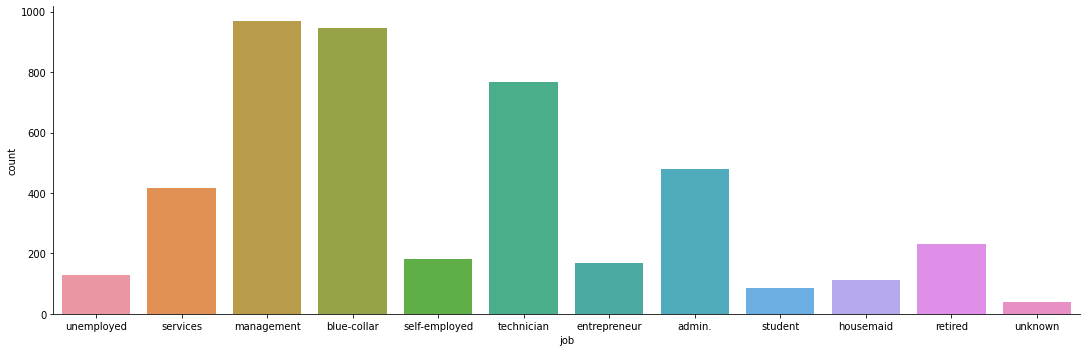

In [33]:
#explore numerical columns
sns.catplot('job',kind = 'count',data = df,aspect =3)

In [34]:
df['job'].replace({'unknown':'self-employed'},inplace=True)

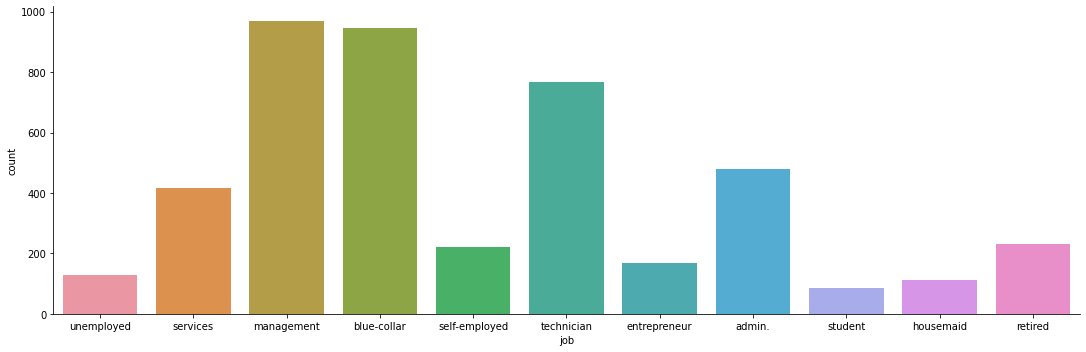

In [35]:
sns.catplot('job',kind = 'count',data = df,aspect =3)

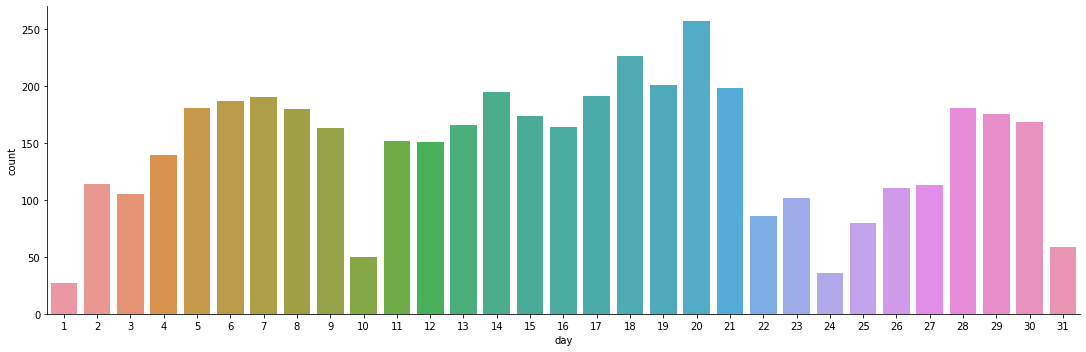

In [36]:
sns.catplot('day',kind = 'count',data = df,aspect =3)

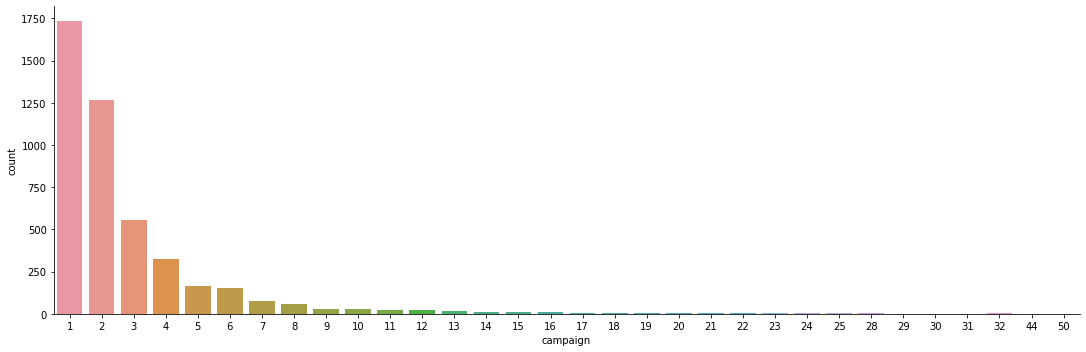

In [37]:
sns.catplot('campaign',kind = 'count',data = df,aspect =3)

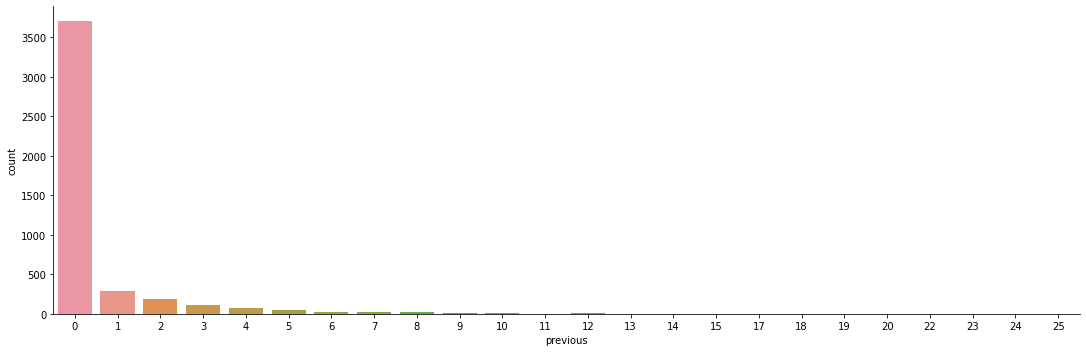

In [38]:
sns.catplot('previous',kind = 'count',data = df,aspect =3)

In [39]:
df['month'] = le.fit_transform(df['month'])
df['job'] = le.fit_transform(df['job'])

In [40]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,0,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,1,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,0,4,1,2,0,1476,1,1,0,3,6,199,4,-1,0,3,0
4,1,1,1,1,0,0,1,0,0,5,8,226,1,-1,0,3,0


In [41]:
#treat for age column 
dur_q1=df['duration'].quantile(q = 0.25)
dur_q2=df['duration'].quantile(q = 0.50)
dur_q3=df['duration'].quantile(q = 0.75)
dur_q4=df['duration'].quantile(q = 1.00)

In [42]:
print('Quartiles:',dur_q1,dur_q2,dur_q3,dur_q4)
outliers2=dur_q3+1.5*dur_q3-1.5*dur_q1
print('outliers:',outliers2)

Quartiles: 104.0 185.0 329.0 3025.0
outliers: 666.5


In [43]:
def clusters2(y):
    if y<=104:
        return 0
    elif y>104 & y<=185:
        return 1
    elif y>185 & y<=329:
        return 2
    elif y>329 & y<=666.5:
        return 4
    elif y>666.5:
        return 5
df['duration'] = df['duration'].astype('int').apply(clusters2)
#df['age_new'] = le.fit_transform(df['age_new'])

In [44]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,10,1,0,0,1787,0,0,0,19,10,0,1,-1,0,3,0
1,0,7,1,1,0,4789,1,1,0,11,8,1,1,339,4,0,0
2,1,4,2,2,0,1350,1,0,0,16,0,1,1,330,1,0,0
3,0,4,1,2,0,1476,1,1,0,3,6,1,4,-1,0,3,0
4,1,1,1,1,0,0,1,0,0,5,8,1,1,-1,0,3,0


In [45]:
df.apply(lambda x : len(x.unique()))

age             2
job            11
marital         3
education       3
default         2
balance      2353
housing         2
loan            2
contact         2
day            31
month          12
duration        2
campaign       32
pdays         292
previous       24
poutcome        4
y               2
dtype: int64

In [46]:
df['marital'].value_counts()

1    2797
2    1196
0     528
Name: marital, dtype: int64

In [47]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
min_max_scaler = preprocessing.MinMaxScaler()

In [48]:
df['pdays'] = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(df['pdays'])))

In [49]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,10,1,0,0,1787,0,0,0,19,10,0,1,0.000000,0,3,0
1,0,7,1,1,0,4789,1,1,0,11,8,1,1,0.389908,4,0,0
2,1,4,2,2,0,1350,1,0,0,16,0,1,1,0.379587,1,0,0
3,0,4,1,2,0,1476,1,1,0,3,6,1,4,0.000000,0,3,0
4,1,1,1,1,0,0,1,0,0,5,8,1,1,0.000000,0,3,0


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

In [51]:
X=df.drop(['balance','y'],axis=1)
y=df['y']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)

In [52]:
#model_1 (LogisticRegression)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
lr=LogisticRegression()

In [53]:
lr.fit(X_train,y_train)
y_pred1=lr.predict(X_test)

/Users/pradee/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [54]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [55]:
confusion_matrix1=confusion_matrix(y_test, y_pred1)
precision_score1=precision_score(y_test, y_pred1)
recall_score1=recall_score(y_test, y_pred1)
accuracy_score1=accuracy_score(y_test, y_pred1)
f1_score1=f1_score(y_test, y_pred1)

In [56]:
print('confusion_matrix:\n',confusion_matrix1)
print('precision_score:',precision_score1)
print('recall_score:',recall_score1)
print('accuracy_score:',accuracy_score1)
print('f1_score:',f1_score1)

confusion_matrix:
 [[804   1]
 [ 99   1]]
precision_score: 0.5
recall_score: 0.01
accuracy_score: 0.8895027624309392
f1_score: 0.0196078431372549


In [57]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       805
           1       0.50      0.01      0.02       100

    accuracy                           0.89       905
   macro avg       0.70      0.50      0.48       905
weighted avg       0.85      0.89      0.84       905



In [58]:
#model_2 (RandomForest)
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
y_pred2=rfc.predict(X_test)

In [59]:
confusion_matrix2=confusion_matrix(y_test, y_pred2)
precision_score2=precision_score(y_test, y_pred2)
recall_score2=recall_score(y_test, y_pred2)
accuracy_score2=accuracy_score(y_test, y_pred2)
f1_score2=f1_score(y_test, y_pred2)

In [60]:
print('confusion_matrix:\n',confusion_matrix2)
print('precision_score:',precision_score2)
print('recall_score:',recall_score2)
print('accuracy_score:',accuracy_score2)
print('f1_score:',f1_score2)

confusion_matrix:
 [[799   6]
 [ 83  17]]
precision_score: 0.7391304347826086
recall_score: 0.17
accuracy_score: 0.901657458563536
f1_score: 0.2764227642276423


In [61]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       805
           1       0.74      0.17      0.28       100

    accuracy                           0.90       905
   macro avg       0.82      0.58      0.61       905
weighted avg       0.89      0.90      0.87       905



In [62]:
#model_3 (DecisionTrees)
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dtc.fit(X_train, y_train)
y_pred3 = dtc.predict(X_test)

In [63]:
confusion_matrix3=confusion_matrix(y_test, y_pred3)
precision_score3=precision_score(y_test, y_pred3)
recall_score3=recall_score(y_test, y_pred3)
accuracy_score3=accuracy_score(y_test, y_pred3)
f1_score3=f1_score(y_test, y_pred3)

In [64]:
print('confusion_matrix:\n',confusion_matrix3)
print('precision_score:',precision_score3)
print('recall_score:',recall_score3)
print('accuracy_score:',accuracy_score3)
print('f1_score:',f1_score3)

confusion_matrix:
 [[731  74]
 [ 60  40]]
precision_score: 0.3508771929824561
recall_score: 0.4
accuracy_score: 0.8519337016574585
f1_score: 0.37383177570093457


In [65]:
#model_4 (xgboost)
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(X_train, y_train)
y_pred4 = xgbc.predict(X_test)

In [66]:
confusion_matrix4=confusion_matrix(y_test, y_pred4)
precision_score4=precision_score(y_test, y_pred4)
recall_score4=recall_score(y_test, y_pred4)
accuracy_score4=accuracy_score(y_test, y_pred4)
f1_score4=f1_score(y_test, y_pred4)

In [67]:
print('confusion_matrix:\n',confusion_matrix4)
print('precision_score:',precision_score4)
print('recall_score:',recall_score4)
print('accuracy_score:',accuracy_score4)
print('f1_score:',f1_score4)

confusion_matrix:
 [[787  18]
 [ 76  24]]
precision_score: 0.5714285714285714
recall_score: 0.24
accuracy_score: 0.8961325966850828
f1_score: 0.33802816901408445


# Final Results 

In [68]:
F_scores = {'Model':  ['Log_R', 'RF','DT','XGB'],
         'conf_matrix': [confusion_matrix1, confusion_matrix2 , confusion_matrix3, confusion_matrix4],
         'precision': [precision_score1,precision_score2,precision_score3,precision_score4],
         'recall': [recall_score1,recall_score2,recall_score3,recall_score4],
         'accuracy': [accuracy_score1,accuracy_score2,accuracy_score3,accuracy_score4],
         'f1': [f1_score1,f1_score2,f1_score3,f1_score4] 
           }

In [69]:
df_scores = pd.DataFrame (F_scores, columns = ['Model','conf_matrix','precision','recall','accuracy','f1'])
df_scores

,Model,conf_matrix,precision,recall,accuracy,f1
0,Log_R,"[[804, 1], [99, 1]]",0.500000,0.01,0.889503,0.019608
1,RF,"[[799, 6], [83, 17]]",0.739130,0.17,0.901657,0.276423
2,DT,"[[731, 74], [60, 40]]",0.350877,0.40,0.851934,0.373832
3,XGB,"[[787, 18], [76, 24]]",0.571429,0.24,0.896133,0.338028
